In [3]:
import pandas as pd

# Memuat data dengan penanganan kesalahan jika file tidak ditemukan
try:
    df = pd.read_csv('train.csv')  # Pastikan path file sudah benar
except FileNotFoundError:
    print("File 'train.csv' tidak ditemukan. Pastikan file berada di direktori yang benar.")
    # Keluarkan program jika file tidak ditemukan
    exit()

# Periksa apakah data telah dimuat
print("Data berhasil dimuat.")
print(df.head())

# Pisahkan kolom numerik dan kategorikal
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Statistik deskriptif untuk kolom numerik
desc = df[numerical_cols].describe().T

# Menambahkan median, Q1, dan Q2 (kuartil) ke statistik deskriptif untuk kolom numerik
desc["median"] = df[numerical_cols].median()
desc["Q1"] = df[numerical_cols].quantile(0.25)
desc["Q2"] = df[numerical_cols].quantile(0.50)

# Menampilkan statistik deskriptif kolom numerik
print("Statistik Deskriptif untuk Kolom Numerik:")
print(desc)

# Statistik deskriptif untuk kolom kategorikal
categorical_desc = df[categorical_cols].describe().T

# Menampilkan statistik deskriptif kolom kategorikal
print("\nStatistik Deskriptif untuk Kolom Kategorikal:")
print(categorical_desc)

# Menangani Missing Data: Mengisi NaN dengan median untuk kolom numerik
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Atau jika kamu lebih memilih menghapus baris yang memiliki NaN
# df = df.dropna()

print("\nData setelah penanganan missing values:")
print(df.head())


Data berhasil dimuat.
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Muat dataset
df = pd.read_csv("train.csv")

# 1. Encoding fitur non-numerik
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = df_encoded[col].fillna("Missing")
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# 2. Pisah fitur X dan target Y
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

# 3. Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1168, 80)
Test shape: (292, 80)


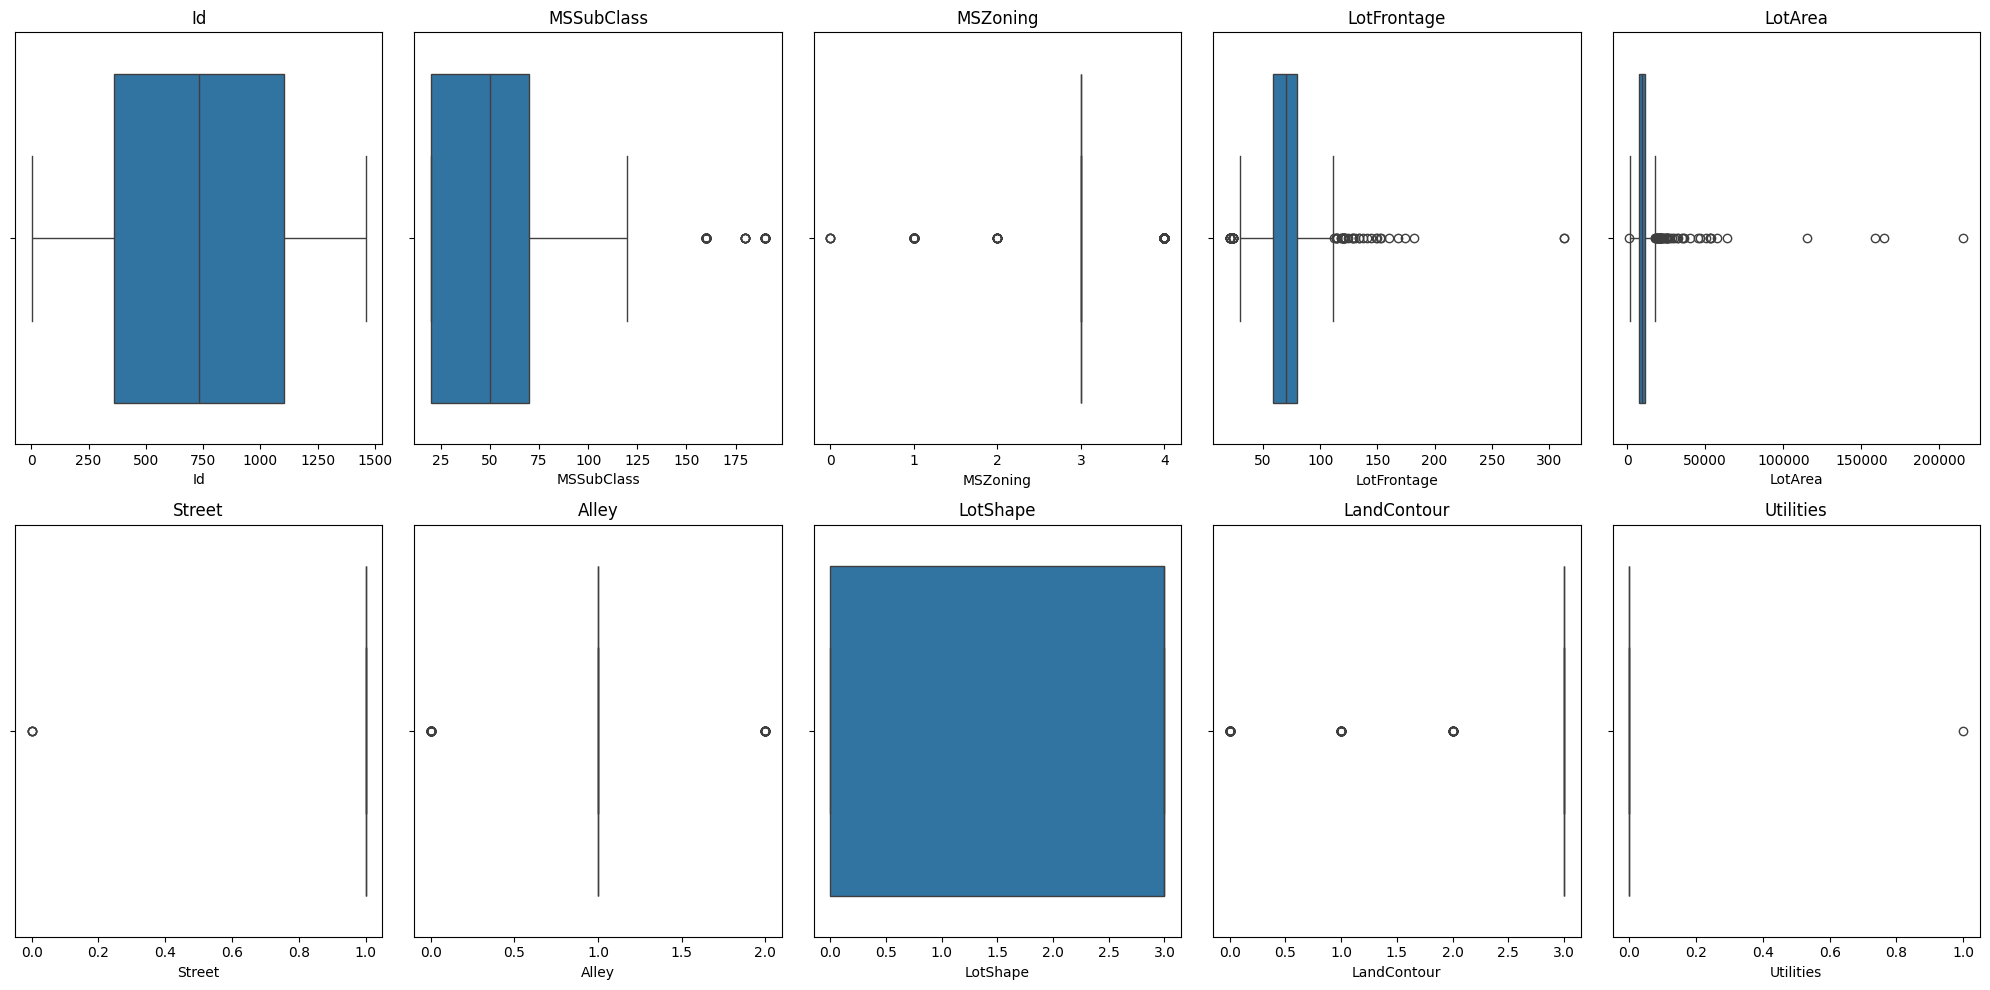

Sebelum menghapus outlier: (1168, 80)
Setelah menghapus outlier: (469, 80)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

# Visualisasi boxplot untuk fitur numerik
numerical_features = X_train.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_features[:10]):  # tampilkan 10 fitur pertama
    plt.subplot(2, 5, i + 1)
    sns.boxplot(x=X_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Identifikasi outlier menggunakan Z-score
z_scores = np.abs(zscore(X_train[numerical_features]))
threshold = 3
outliers = (z_scores > threshold)

# Hapus baris yang memiliki outlier di fitur manapun
non_outlier_mask = ~(outliers.any(axis=1))
X_train_no_outliers = X_train[non_outlier_mask]
y_train_no_outliers = y_train[non_outlier_mask]

print("Sebelum menghapus outlier:", X_train.shape)
print("Setelah menghapus outlier:", X_train_no_outliers.shape)


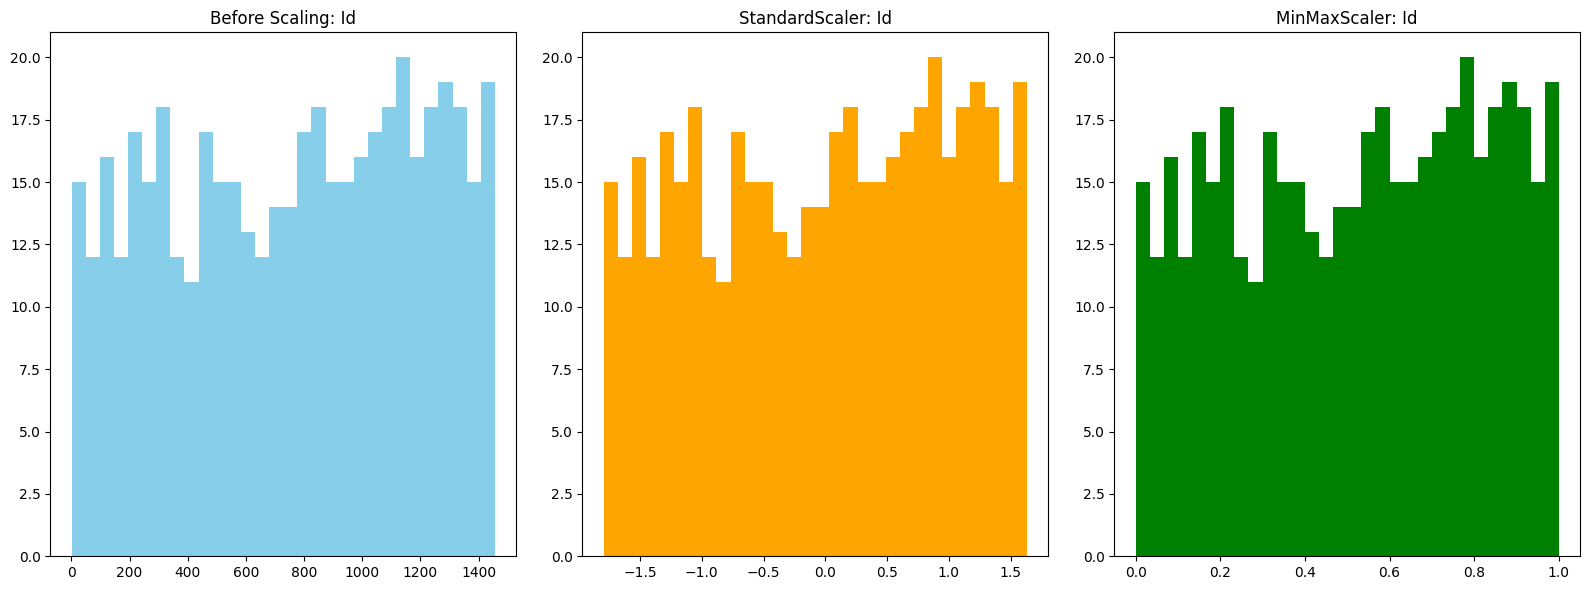

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Pilih fitur numerik dari data yang sudah bebas outlier
numerical_cols = X_train_no_outliers.select_dtypes(include='number').columns

# Scaling
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

X_train_std = scaler_std.fit_transform(X_train_no_outliers[numerical_cols])
X_train_minmax = scaler_minmax.fit_transform(X_train_no_outliers[numerical_cols])

# Plot histogram sebelum scaling
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.hist(X_train_no_outliers[numerical_cols[0]], bins=30, color='skyblue')
plt.title(f'Before Scaling: {numerical_cols[0]}')

# Histogram setelah StandardScaler
plt.subplot(1, 3, 2)
plt.hist(X_train_std[:, 0], bins=30, color='orange')
plt.title(f'StandardScaler: {numerical_cols[0]}')

# Histogram setelah MinMaxScaler
plt.subplot(1, 3, 3)
plt.hist(X_train_minmax[:, 0], bins=30, color='green')
plt.title(f'MinMaxScaler: {numerical_cols[0]}')

plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Memuat data
df = pd.read_csv('train.csv')

# Periksa nama kolom yang ada dalam dataset
print("Nama Kolom dalam Dataset:", df.columns)

# Misalkan nama kolom target adalah 'SalePrice', ganti sesuai dengan nama kolom target di datasetmu
target_column = 'SalePrice'  # Ganti dengan nama kolom target yang sesuai

# Pisahkan fitur dan target
X = df.drop(target_column, axis=1)  # Menghapus kolom target dari fitur
y = df[target_column]  # Kolom target

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pisahkan kolom numerik dan kategorikal
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

# Inisialisasi SimpleImputer untuk imputasi
# Imputasi untuk kolom numerik dengan median
numerical_imputer = SimpleImputer(strategy='median')

# Imputasi untuk kolom kategorikal dengan modus
categorical_imputer = SimpleImputer(strategy='most_frequent')

# One-Hot Encoding untuk kolom kategorikal
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Membuat kolom transformasi menggunakan ColumnTransformer dan Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_imputer, numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', categorical_imputer),
            ('onehot', onehot_encoder)
        ]), categorical_cols)
    ])

# Membuat model Linear Regression dengan preprocessing dalam pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Melatih model dengan data training
model_pipeline.fit(X_train, y_train)

# Prediksi dengan data testing
y_pred_clean = model_pipeline.predict(X_test)

# Menampilkan hasil prediksi
print("Model berhasil dilatih dan prediksi selesai.")

# Menampilkan nilai R² untuk evaluasi model
print(f"R² Model: {model_pipeline.score(X_test, y_test)}")


Nama Kolom dalam Dataset: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
      

In [17]:
import pandas as pd

# Memuat data
df = pd.read_csv('train.csv')

# Menampilkan nama-nama kolom dalam dataset
print("Nama Kolom dalam Dataset:", df.columns)

# Tentukan nama kolom target dan fitur (ganti dengan nama yang sesuai)
target_column = 'SalePrice'  # Ganti dengan nama kolom target yang sesuai
feature_column = 'OverallQual'  # Ganti dengan nama kolom fitur yang sesuai

# Mengecek apakah kolom yang dipilih ada dalam dataset
if target_column not in df.columns:
    raise ValueError(f"Kolom target '{target_column}' tidak ditemukan dalam dataset!")
if feature_column not in df.columns:
    raise ValueError(f"Kolom fitur '{feature_column}' tidak ditemukan dalam dataset!")

# Menyiapkan fitur dan target
X = df[[feature_column]]  # Fitur yang digunakan
y = df[target_column]     # Target

# Menampilkan beberapa data untuk memastikan tidak ada error
print(X.head())
print(y.head())


Nama Kolom dalam Dataset: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
      

In [19]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Memuat data
df = pd.read_csv('train.csv')

# Misalkan nama kolom target adalah 'SalePrice', ganti sesuai dengan nama kolom target di datasetmu
target_column = 'SalePrice'  # Ganti dengan nama kolom target yang sesuai

# Pisahkan fitur dan target
X = df.drop(target_column, axis=1)  # Menghapus kolom target dari fitur
y = df[target_column]  # Kolom target

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pisahkan kolom numerik dan kategorikal
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

# Inisialisasi SimpleImputer untuk imputasi
# Imputasi untuk kolom numerik dengan median
numerical_imputer = SimpleImputer(strategy='median')

# Imputasi untuk kolom kategorikal dengan modus
categorical_imputer = SimpleImputer(strategy='most_frequent')

# One-Hot Encoding untuk kolom kategorikal
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Membuat kolom transformasi menggunakan ColumnTransformer dan Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_imputer, numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', categorical_imputer),
            ('onehot', onehot_encoder)
        ]), categorical_cols)
    ])

# Membuat model KNN dengan preprocessing dalam pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

# Evaluasi KNN dengan berbagai nilai K
k_values = [3, 5, 7]
for k in k_values:
    # Set nilai K pada model KNN
    knn_pipeline.set_params(knn__n_neighbors=k)

    # Melatih model
    knn_pipeline.fit(X_train, y_train)

    # Prediksi dengan data testing
    y_pred = knn_pipeline.predict(X_test)

    # Evaluasi performa
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Menampilkan hasil evaluasi
    print(f"Evaluasi untuk K = {k}:")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  R²: {r2}")
    print("="*50)


Evaluasi untuk K = 3:
  Mean Squared Error (MSE): 2382597572.6925416
  R²: 0.6893746747745828
Evaluasi untuk K = 5:
  Mean Squared Error (MSE): 2359467665.818219
  R²: 0.6923901797543645
Evaluasi untuk K = 7:
  Mean Squared Error (MSE): 2512110763.5737348
  R²: 0.6724897096006325


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Memuat data
df = pd.read_csv('train.csv')

# Misalkan nama kolom target adalah 'SalePrice', ganti sesuai dengan nama kolom target di datasetmu
target_column = 'SalePrice'  # Ganti dengan nama kolom target yang sesuai

# Pisahkan fitur dan target
X = df.drop(target_column, axis=1)  # Menghapus kolom target dari fitur
y = df[target_column]  # Kolom target

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pisahkan kolom numerik dan kategorikal
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

# Inisialisasi SimpleImputer untuk imputasi
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# One-Hot Encoding untuk kolom kategorikal
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Membuat kolom transformasi menggunakan ColumnTransformer dan Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_imputer, numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', categorical_imputer),
            ('onehot', onehot_encoder)
        ]), categorical_cols)
    ])

# Membuat model KNN dengan preprocessing dalam pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

# Evaluasi KNN dengan berbagai nilai K
k_values = [3, 5, 7]
mse_knn = []
r2_knn = []

for k in k_values:
    # Set nilai K pada model KNN
    knn_pipeline.set_params(knn__n_neighbors=k)

    # Melatih model
    knn_pipeline.fit(X_train, y_train)

    # Prediksi dengan data testing
    y_pred = knn_pipeline.predict(X_test)

    # Evaluasi performa
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Menyimpan hasil evaluasi
    mse_knn.append(mse)
    r2_knn.append(r2)

# Evaluasi Linear Regression
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('linear', LinearRegression())
])

linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Evaluasi Polynomial Regression dengan degree 2 dan 3
poly_degrees = [2, 3]
mse_poly = []
r2_poly = []

for degree in poly_degrees:
    poly_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])

    poly_model.fit(X_train, y_train)
    y_pred_poly = poly_model.predict(X_test)
    mse_poly.append(mean_squared_error(y_test, y_pred_poly))
    r2_poly.append(r2_score(y_test, y_pred_poly))

# Menyusun semua hasil evaluasi
mse_values = [mse_linear] + mse_poly + mse_knn
r2_values = [r2_linear] + r2_poly + r2_knn

# Menampilkan hasil evaluasi
print("MSE for Linear Regression, Polynomial Regression (degree 2, 3), and KNN:")
print(mse_values)

print("\nR² for Linear Regression, Polynomial Regression (degree 2, 3), and KNN:")
print(r2_values)
